# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'age':[17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

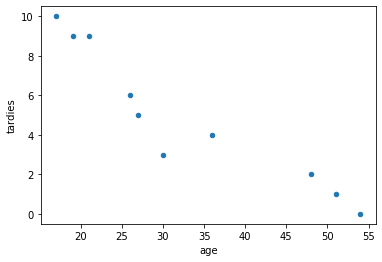

In [3]:
# Your code here.
student_data.plot.scatter(x='age', y='tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
#  Generally we see a linear trend, with the number of tardies declining as age increases. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
print(student_data.corr())




              age   tardies
age      1.000000 -0.939163
tardies -0.939163  1.000000


In [6]:
#covariance:
import numpy as np
np.cov(student_data.age, student_data.tardies)[0,1]

-45.56666666666666

In [ ]:
"""
Covariance indicates the direction of the linear relationship between variables. 
Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables
The slope of the line which is the best fit passes in straight line making almost a 45 degree angle.
The coorelation tell us that both the values are highly coorelated but negatively so. That means the higher the age the lesser
the tardiness.
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
import statsmodels.api as sm
x = sm.add_constant(student_data.age)
model = sm.OLS(student_data.tardies,x)
results = model.fit()
print(results.summary())

#outcome: tardies
#regression type: univariate linear

                            OLS Regression Results                            
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Fri, 29 May 2020   Prob (F-statistic):           5.57e-05
Time:                        12:22:49   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\sudis\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Plot your regression model on your scatter plot.

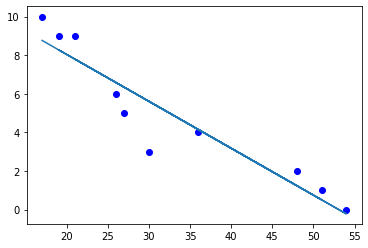

In [9]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data.age, student_data.tardies, color = 'blue')
plt.plot(student_data.age, results.predict(x))

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# The model stands good as they are negatively coorelated.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here. 
df = pd.read_csv('vehicles.csv')

In [12]:
df.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
"""
Since  Fuels Barrels/Year, Highway MPG and Combined MPG are highly correlate (positive and negative). 
They will help us to determine CO2 emmission .
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here. 
x = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
model = sm.OLS(df['CO2 Emission Grams/Mile'],x)
results = model.fit()
print(results.summary())

# multivarible linear

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Fri, 29 May 2020   Prob (F-statistic):                        0.00
Time:                             12:34:10   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
"""
Here the adjusted R square is 0.999 which mean 99.9%  of the variance can be explained, which is really high. 
Here all the p-value smaller than 0.05,which determines that it is a good model.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here. 
party_data = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

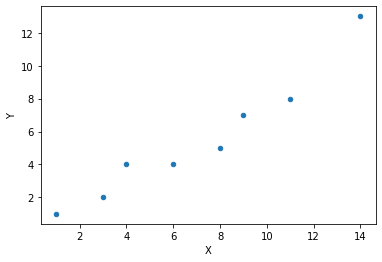

In [15]:
# Your code here.
party_data.plot.scatter(x='X', y='Y')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [16]:
# Your response here.
"""
The plot shows an increasing trend supporting the hypothesis
 that the more people I invite the more people are unable to attend
"""

x = sm.add_constant(party_data.X)
model = sm.OLS(party_data.Y,x)
results = model.fit()
print(results.summary())

"""
Here p>0.05 which is not good as  the truth value of the event happening decreases.
"""

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Fri, 29 May 2020   Prob (F-statistic):           0.000102
Time:                        12:43:50   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\sudis\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 